# Aula 02 - Árvores de Decisão

![image](./images/dt_gen01.png)

Nesta aula iremos aprender os seguintes tópicos:
- 1. Introdução árvores de decisão
- 2. Árvores de decisão [classificação] 
- 3. Árvores de regressão

### Exemplo

**Para onde vamos?** <br>

<img src="./images/decision.png" width=500>

<center><h2> "Uma decisão pode ser tomada como uma sequência de pequenas decisões."</h2></center>

----------------------------

### Modelo de árvore

![image](./images/arvore.png)

### Superfície de Decisão
![images](./images/boundary2.png)

### Superfície de decisão - Overfitting e Underfitting
![images](./images/boundary.png)

----------------------------

### Quando trabalhamos com múltiplas variáveis, como definir qual variável vamos utilizar primeiro para o Nó?

Vamos utilizar o exemplo de uma amostra de 30 alunos com duas variáveis: Sexo (menino ou menina), Classe (IX ou X). Além disso 15 dos 30 alunos jogam tênis no intervalo. Dado isso, a pergunta que fica é: **Qual variável/feature utilizar para fazer a quebra do nó raiz: sexo ou classe?**

Há duas possibilidades de quebras:

<img src="https://i2.wp.com/www.vooo.pro/insights/wp-content/uploads/2016/12/RDS-Vooo-Tutorial_completo_arvore_decisao_03.jpg?resize=617%2C293&ssl=1" width=500>

Vemos que, **dependendo da feature que utilizamos pra fazer a quebra**, conseguimos **graus de separações diferentes dos dados com relação ao target**.

Como decidir então, qual das quebras acima **separou melhor os dados com relação ao target [ joga(s/n) ]?**

Matematicamente, o modelo pode usar dois critérios diferentes para decidir como fazer as quebras na árvore: o **critério de Gini** ou o **critério da entropia**.

### **Critério de Gini**

A **impureza de Gini** mede o quão "impuras" são as folhas das árvores construídas após as quebras nos nós. O coeficiente é dado por:

$$Gini(D) = 1 - \sum{p_{i}^2}$$

Onde $p_i$ são as proporções de separação do target em cada quebra.

Aqui estaremos interessados **em como a impureza muda após as quebras**. Nosso objetivo será **maximizar a purificação proporcionada pela quebra nos nós** -- mais precisamente, estamos interessados em determinar **qual é a quebra que proporciona a maior purificação**.

<table border="1px">
<thead>
  <tr>
    <th colspan="4"><center>Sexo</center></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td colspan="2"><center>Meninas</center></td>
    <td colspan="2"><center>Meninos</center></td>
  </tr>
  <tr>
    <td><center>jogam tênis</center></td>
    <td><center>NÃO jogam tênis</center></td>
    <td><center>jogam tênis</center></td>
    <td><center>NÃO jogam tênis</center></td>
  </tr>
  <tr>
    <td><center>2</center></td>
    <td><center>8</center></td>
    <td><center>13</center></td>
    <td><center>7</center></td>
  </tr>
  <tr>
    <td colspan="2"><center>10</center></td>
    <td colspan="2"><center>20</center></td>
  </tr>
</tbody>
</table>


- **Impureza antes da divisão**: Como não havia separação alguma, a impureza era dada simplesmente pelo balanço natural dos dados:

$$G(\text{pré-divisão}) = 1 - ((15/30)^2 + (15/30)^2) = 0.5$$

Temos duas quebras possíveis:

- Divisão por **sexo**: após a divisão dos dados pela feature **sexo**, passamos a ter as seguintes impurezas, segundo a tabela acima:

    - $G(\text{meninas}) = 1 - (\frac{2}{10}^2 + \frac{8}{10}^2) = 0.319$

    - $G(\text{meninos}) = 1 - ( \frac{13}{20}^2 + \frac{7}{20}^2) = 0.454$

    Ou seja, após a divisão, a impureza total passa a ser a média ponderada:

    <br>

    - $G(\text{pós-divisão}) = \frac{10}{30} \times G(\text{meninas}) + \frac{20}{30} \times G(\text{meninos})
    = 0.33 \times 0.319 + 0.66 \times 0.454
    = 0.40491$

    Assim, **a perda de impureza proporcionada pela quebra** dos dados segundo a feature **sexo** é de:

    <br>

    - $\Delta G_{\text{sexo}} = G(\text{pré-divisão}) - G(\text{pós-divisão}) = 0.5 - 0.40491 = $ **0.095**


<br>

<table>
<thead>
  <tr>
    <th colspan="4"><center>Classe</center></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td colspan="2"><center>Classe IX</center></td>
    <td colspan="2"><center>Classe X</center></td>
  </tr>
  <tr>
    <td><center>jogam tênis</center></td>
    <td><center>NÃO jogam tênis</center></td>
    <td><center>jogam tênis</center></td>
    <td><center>NÃO jogam tênis</center></td>
  </tr>
  <tr>
    <td><center>6</center></td>
    <td><center>8</center></td>
    <td><center>9</center></td>
    <td><center>7</center></td>
  </tr>
  <tr>
    <td colspan="2"><center>14</center></td>
    <td colspan="2"><center>16</center></td>
  </tr>
</tbody>
</table>



- Divisão por **classe**: após a divisão dos dados pela feature **classe**, passamos a ter as seguintes impurezas, segundo a tabela acima:

    - $G(\text{IX}) = 1 - (\frac{6}{14}^2 + \frac{8}{14}^2) = 0.489$

    - $G(\text{X}) = 1 - ( \frac{9}{16}^2 + \frac{7}{16}^2) = 0.492$

    Ou seja, após a divisão, a impureza total passa a ser a média ponderada:

    <br>

    - $G(\text{pós-divisão}) = \frac{14}{30} \times G(\text{IX}) + \frac{16}{30} \times G(\text{X})
    = 0.46 \times 0.489 + 0.53 \times 0.492
    = 0.4857$

    Assim, **a perda de impureza proporcionada pela quebra** dos dados segundo a feature **classe** é de:

    <br>

    - $\Delta G_{\text{classe}} = G(\text{pré-divisão}) - G(\text{pós-divisão}) = 0.5 - 0.4857 = $ **0.014**

Agora, como escolher a melhor quebra?

> O **critério de Gini** consiste em **escolher a quebra que proporciona a maior perda de impureza**, ou, equivalentemente, **a maior purificação**.

Assim, a divisão a ser escolhida seria por **sexo**.

Depois, aplica-se o mesmo procedimento para os nós resultantes.

### **Critério de entropia**

A **entropia** é uma quantidade definida em física e teoria da informação com o objetivo de quantificar **o grau de desordem de um sistema**, ou, equivalentemente, **o quanto de informação se tem sobre determinado sistema**.

A entropia é dada por:

 $$E = -\sum{p_{i} \times \log_{2}{p_{i}}}$$


Onde $p_i$ são as proporções de separação do target em cada quebra.

Aqui estaremos interessados **em como a impureza muda após as quebras**.

Aqui também estaremos interessados **em como a entropia muda após as quebras**. Nosso objetivo será **maximizar o ganho de informação proporcionado pela quebra nos nós** -- mais precisamente, estamos interessados em determinar **qual é a quebra que proporciona o maior ganho de informação**.

- **Entropia antes da divisão**:

$$E(pré-divisão) = -1 * ( \frac{15}{30}log_{2}{\frac{15}{30}} + \frac{15}{30}log_{2}{\frac{15}{30}} ) = 1$$


Temos duas quebras possíveis:

- **Divisão por sexo**:

    - $E(\text{meninas}) = -1 \times (\frac{2}{10} \log_{2}\frac{2}{10} + \frac{8}{10} \log_{2}\frac{8}{10}) = 0.721$
    - $E(\text{meninos}) = -1 \times (\frac{13}{20} \log_{2}\frac{13}{20} + \frac{7}{20} \log_{2}\frac{7}{20}) = 0.934$

    A entropia ponderada após a divisão por **sexo** é:

    <br>

    - $E(\text{pós-divisão}) = \frac{10}{30} \times E(\text{meninas}) + \frac{20}{30} \times E(\text{meninos}) =  0.863$

    Assim, o ganho de informação após a divisão por **sexo** é:

    <br>

    - $\Delta E_{\text{sexo}} = E(\text{pré-divisão}) - E(\text{pós-divisão}) = 1 - 0.863 =$ **0.137**

<br>

- **Divisão por classe**:

    - $E(\text{IX}) = -1 \times (\frac{6}{14} \log_{2}\frac{6}{14} + \frac{8}{14} \log_{2}\frac{8}{14}) = 0.985$
    - $E(\text{X}) = -1 \times (\frac{9}{16} \log_{2}\frac{9}{16} + \frac{7}{16} \log_{2}\frac{7}{16}) = 0.988$

    A entropia ponderada após a divisão por **classe** é:

    <br>

    - $E(\text{pós-divisão}) = \frac{10}{30} \times E(\text{IX}) + \frac{20}{30} \times E(\text{X}) =  0.986$

    Assim, o ganho de informação após a divisão por **classe** é:

    <br>

    - $\Delta E_{\text{classe}} = E(\text{pré-divisão}) - E(\text{pós-divisão}) = 1 - 0.986 =$ **0.014**

Também pela entropia, a divisão a ser escolhida seria por **sexo**.

Depois, aplica-se o mesmo procedimento para os nós resultantes, até obter-se nós puros.

### Caso prático
`Fonte`: https://www.kaggle.com/datasets/conorsully1/credit-score

![image](./images/credit_score.png)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('credit_score.csv')
df

CUST_ID  INCOME  SAVINGS     DEBT  R_SAVINGS_INCOME  R_DEBT_INCOME  \
0    C02COQEVYU   33269        0   532304            0.0000        16.0000   
1    C02OZKC0ZF   77158    91187   315648            1.1818         4.0909   
2    C03FHP2D0A   30917    21642   534864            0.7000        17.3000   
3    C03PVPPHOY   80657    64526   629125            0.8000         7.8000   
4    C04J69MUX0  149971  1172498  2399531            7.8182        16.0000   
..          ...     ...      ...      ...               ...            ...   
995  CZQHJC9HDH  328892  1465066  5501471            4.4546        16.7273   
996  CZRA4MLB0P   81404    88805   680837            1.0909         8.3637   
997  CZSOD1KVFX       0    42428    30760            3.2379         8.1889   
998  CZWC76UAUT   36011     8002   604181            0.2222        16.7777   
999  CZZV5B3SAL   44266   309859    44266            6.9999         1.0000   

     R_DEBT_SAVINGS  T_CLOTHING_12  T_CLOTHING_6  R_CLOTHING  ...  \
0            1.2000           1889           945      0.5003  ...   
1            3.4615           5818           111      0.0191  ...   
2           24.7142           1157           860      0.7433  ...   
3            9.7499           6857          3686      0.5376  ...   
4            2.0465           1978           322      0.1628  ...   
..              ...            ...           ...         ...  ...   
995          3.7551          16701         10132      0.6067  ...   
996          7.6667           5400          1936      0.3585  ...   
997          0.7250              0             0      0.8779  ...   
998         75.5037           1993          1271      0.6377  ...   
999          0.1429           1574          1264      0.8030  ...   

     R_EXPENDITURE_SAVINGS  R_EXPENDITURE_DEBT  CAT_GAMBLING  CAT_DEBT  \
0                   0.0000              0.0625          High         1   
1                   0.7692              0.2222            No         1   
2                   1.4286              0.0578          High         1   
3                   1.2500              0.1282          High         1   
4                   0.1163              0.0568          High         1   
..                     ...                 ...           ...       ...   
995                 0.2041              0.0543          High         1   
996                 0.8333              0.1087            No         1   
997                 0.2500              0.3448            No         1   
998                 5.0002              0.0662            No         1   
999                 0.1587              1.1111            No         1   

     CAT_CREDIT_CARD  CAT_MORTGAGE  CAT_SAVINGS_ACCOUNT  CAT_DEPENDENTS  \
0                  0             0                    0               0   
1                  0             0                    1               0   
2                  0             0                    1               0   
3                  0             0                    1               0   
4                  1             1                    1               1   
..               ...           ...                  ...             ...   
995                1             1                    1               1   
996                0             0                    1               0   
997                0             0                    1               0   
998                1             0                    1               0   
999                0             0                    1               0   

     CREDIT_SCORE  DEFAULT  
0             444        1  
1             625        0  
2             469        1  
3             559        0  
4             473        0  
..            ...      ...  
995           418        0  
996           589        1  
997           499        0  
998           507        0  
999           657        0  

[1000 rows x 87 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CUST_ID                  1000 non-null   object 
 1   INCOME                   1000 non-null   int64  
 2   SAVINGS                  1000 non-null   int64  
 3   DEBT                     1000 non-null   int64  
 4   R_SAVINGS_INCOME         1000 non-null   float64
 5   R_DEBT_INCOME            1000 non-null   float64
 6   R_DEBT_SAVINGS           1000 non-null   float64
 7   T_CLOTHING_12            1000 non-null   int64  
 8   T_CLOTHING_6             1000 non-null   int64  
 9   R_CLOTHING               1000 non-null   float64
 10  R_CLOTHING_INCOME        1000 non-null   float64
 11  R_CLOTHING_SAVINGS       1000 non-null   float64
 12  R_CLOTHING_DEBT          1000 non-null   float64
 13  T_EDUCATION_12           1000 non-null   int64  
 14  T_EDUCATION_6            

In [5]:
numerics = ['int16','int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df.select_dtypes(include=numerics)
df_numeric

INCOME  SAVINGS     DEBT  R_SAVINGS_INCOME  R_DEBT_INCOME  \
0     33269        0   532304            0.0000        16.0000   
1     77158    91187   315648            1.1818         4.0909   
2     30917    21642   534864            0.7000        17.3000   
3     80657    64526   629125            0.8000         7.8000   
4    149971  1172498  2399531            7.8182        16.0000   
..      ...      ...      ...               ...            ...   
995  328892  1465066  5501471            4.4546        16.7273   
996   81404    88805   680837            1.0909         8.3637   
997       0    42428    30760            3.2379         8.1889   
998   36011     8002   604181            0.2222        16.7777   
999   44266   309859    44266            6.9999         1.0000   

     R_DEBT_SAVINGS  T_CLOTHING_12  T_CLOTHING_6  R_CLOTHING  \
0            1.2000           1889           945      0.5003   
1            3.4615           5818           111      0.0191   
2           24.7142           1157           860      0.7433   
3            9.7499           6857          3686      0.5376   
4            2.0465           1978           322      0.1628   
..              ...            ...           ...         ...   
995          3.7551          16701         10132      0.6067   
996          7.6667           5400          1936      0.3585   
997          0.7250              0             0      0.8779   
998         75.5037           1993          1271      0.6377   
999          0.1429           1574          1264      0.8030   

     R_CLOTHING_INCOME  ...  R_EXPENDITURE_INCOME  R_EXPENDITURE_SAVINGS  \
0               0.0568  ...                1.0000                 0.0000   
1               0.0754  ...                0.9091                 0.7692   
2               0.0374  ...                1.0000                 1.4286   
3               0.0850  ...                1.0000                 1.2500   
4               0.0132  ...                0.9091                 0.1163   
..                 ...  ...                   ...                    ...   
995             0.0508  ...                0.9091                 0.2041   
996             0.0663  ...                0.9091                 0.8333   
997             0.0047  ...                1.0668                 0.2500   
998             0.0553  ...                1.1111                 5.0002   
999             0.0356  ...                1.1111                 0.1587   

     R_EXPENDITURE_DEBT  CAT_DEBT  CAT_CREDIT_CARD  CAT_MORTGAGE  \
0                0.0625         1                0             0   
1                0.2222         1                0             0   
2                0.0578         1                0             0   
3                0.1282         1                0             0   
4                0.0568         1                1             1   
..                  ...       ...              ...           ...   
995              0.0543         1                1             1   
996              0.1087         1                0             0   
997              0.3448         1                0             0   
998              0.0662         1                1             0   
999              1.1111         1                0             0   

     CAT_SAVINGS_ACCOUNT  CAT_DEPENDENTS  CREDIT_SCORE  DEFAULT  
0                      0               0           444        1  
1                      1               0           625        0  
2                      1               0           469        1  
3                      1               0           559        0  
4                      1               1           473        0  
..                   ...             ...           ...      ...  
995                    1               1           418        0  
996                    1               0           589        1  
997                    1               0           499        0  
998                    1               0           50

In [6]:
df_features = df_numeric[df_numeric.columns[:-2]]
df_features

INCOME  SAVINGS     DEBT  R_SAVINGS_INCOME  R_DEBT_INCOME  \
0     33269        0   532304            0.0000        16.0000   
1     77158    91187   315648            1.1818         4.0909   
2     30917    21642   534864            0.7000        17.3000   
3     80657    64526   629125            0.8000         7.8000   
4    149971  1172498  2399531            7.8182        16.0000   
..      ...      ...      ...               ...            ...   
995  328892  1465066  5501471            4.4546        16.7273   
996   81404    88805   680837            1.0909         8.3637   
997       0    42428    30760            3.2379         8.1889   
998   36011     8002   604181            0.2222        16.7777   
999   44266   309859    44266            6.9999         1.0000   

     R_DEBT_SAVINGS  T_CLOTHING_12  T_CLOTHING_6  R_CLOTHING  \
0            1.2000           1889           945      0.5003   
1            3.4615           5818           111      0.0191   
2           24.7142           1157           860      0.7433   
3            9.7499           6857          3686      0.5376   
4            2.0465           1978           322      0.1628   
..              ...            ...           ...         ...   
995          3.7551          16701         10132      0.6067   
996          7.6667           5400          1936      0.3585   
997          0.7250              0             0      0.8779   
998         75.5037           1993          1271      0.6377   
999          0.1429           1574          1264      0.8030   

     R_CLOTHING_INCOME  ...  T_EXPENDITURE_6  R_EXPENDITURE  \
0               0.0568  ...            19286         0.5797   
1               0.0754  ...            25114         0.3580   
2               0.0374  ...            17618         0.5698   
3               0.0850  ...            40205         0.4985   
4               0.0132  ...            62766         0.4604   
..                 ...  ...              ...            ...   
995             0.0508  ...           155258         0.5193   
996             0.0663  ...            31470         0.4252   
997             0.0047  ...             7878         0.7427   
998             0.0553  ...            26015         0.6502   
999             0.0356  ...            23313         0.4740   

     R_EXPENDITURE_INCOME  R_EXPENDITURE_SAVINGS  R_EXPENDITURE_DEBT  \
0                  1.0000                 0.0000              0.0625   
1                  0.9091                 0.7692              0.2222   
2                  1.0000                 1.4286              0.0578   
3                  1.0000                 1.2500              0.1282   
4                  0.9091                 0.1163              0.0568   
..                    ...                    ...                 ...   
995                0.9091                 0.2041              0.0543   
996                0.9091                 0.8333              0.1087   
997                1.0668                 0.2500              0.3448   
998                1.1111                 5.0002              0.0662   
999                1.1111                 0.1587              1.1111   

     CAT_DEBT  CAT_CREDIT_CARD  CAT_MORTGAGE  CAT_SAVINGS_ACCOUNT  \
0           1                0             0                    0   
1           1                0             0                    1   
2           1                0             0                    1   
3           1                0             0                    1   
4           1                1             1                    1   
..        ...              ...           ...                  ...   
995         1                1             1                    1   
996         1                0             0                    1   
997         1                0             0                    1   
998         1                1             0                    1   
999         1                0             0                  

In [7]:
df_target = df_numeric['DEFAULT']

<Axes: ylabel='Frequency'>

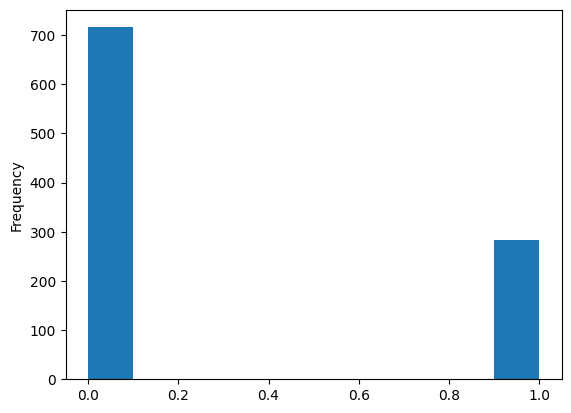

In [8]:
df_target.plot(kind='hist')

### Treinamento

In [9]:
from sklearn.model_selection import train_test_split

X = df_features
y = df_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=10, stratify=y)

### Modelo

In [10]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None, 
    min_samples_split=5,
    min_samples_leaf=1,
    class_weight=None #{0:1,1:3}
)

In [11]:
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=5)

In [12]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], d

<Axes: ylabel='Frequency'>

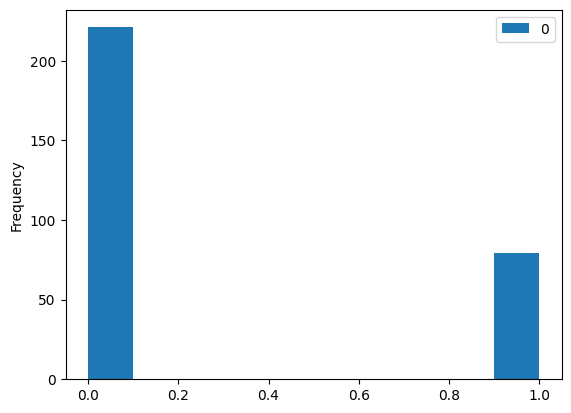

In [13]:
df_pred = pd.DataFrame(y_pred)
df_pred.plot(kind='hist')

In [14]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)

0.6266666666666667

### Visualização da árvore de decisão

In [15]:
from sklearn import tree

plt.figure(figsize=(20,20), dpi=800)
tree.plot_tree(model, filled=True, feature_names=X_train.columns.tolist())
plt.show()

In [16]:
import dtreeviz

viz_model = dtreeviz.model(model, 
                          X_train=X_train, y_train=y_train, 
                          feature_names=X_train.columns.tolist(),
                          target_name='DEFAULT',
                          class_names=['1','0'])

v = viz_model.view()
v.save('default.svg')

c:\Users\kelen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


### Top 10 features

In [17]:
model.feature_importances_

array([0.03155592, 0.        , 0.        , 0.        , 0.09177293,
       0.        , 0.00336966, 0.02134855, 0.01485952, 0.01783143,
       0.03329754, 0.        , 0.        , 0.        , 0.01083639,
       0.02832162, 0.        , 0.01319268, 0.02034751, 0.03821259,
       0.02211548, 0.00807536, 0.01061395, 0.        , 0.        ,
       0.        , 0.02932645, 0.        , 0.        , 0.00681062,
       0.        , 0.00345868, 0.01635546, 0.02187652, 0.        ,
       0.02480634, 0.        , 0.        , 0.08696905, 0.00832012,
       0.00801939, 0.01963859, 0.0202573 , 0.        , 0.        ,
       0.02109805, 0.01003018, 0.02014569, 0.01261761, 0.00764284,
       0.0064129 , 0.00660423, 0.        , 0.00853733, 0.        ,
       0.        , 0.        , 0.01651058, 0.03262175, 0.02905147,
       0.00609429, 0.01253772, 0.02103172, 0.01257344, 0.015983  ,
       0.02333707, 0.        , 0.        , 0.02208167, 0.02612953,
       0.        , 0.00935097, 0.00640774, 0.        , 0.     

In [18]:
df_feature_importance = pd.DataFrame(model.feature_importances_, X_train.columns.tolist())
df_feature_importance.columns = ['Importance']
df_feature_importance = df_feature_importance.sort_values('Importance', ascending=False)
df_feature_importance.head(10)

Importance
R_DEBT_INCOME           0.091773
R_GROCERIES             0.086969
R_EXPENDITURE_INCOME    0.043278
T_ENTERTAINMENT_6       0.038213
R_CLOTHING_SAVINGS      0.033298
R_TAX_SAVINGS           0.032622
INCOME                  0.031556
R_FINES                 0.029326
R_TAX_DEBT              0.029051
R_EDUCATION_INCOME      0.028322

### Avaliação do modelo

### Produção